**Import Essential Libraries**

In [39]:
# libraries used for visualizations and cleaning of data
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import plotly.express as px
from IPython.display import Image
sb.set()

# libraries used to train and evaluate different regression models
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, scale
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV

# to ignore warnings
import warnings
warnings.filterwarnings("ignore")


In [40]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


---
**Data Information**

The `kc_house_data` dataset was obtained from kaggle from the following link: https://www.kaggle.com/datasets/harlfoxem/housesalesprediction/data

This dataset contains house sale prices in King County, particularly houses sold from May 2014 to May 2015. It contains information on the houses sold such as the number of bedrooms, bathrooms, year it was built, year it was renovated etc.

In [41]:
rawData = pd.read_csv("/content/drive/MyDrive/kc_house_data.csv")
rawData.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


---
**Data Description:**

> `id`:  Unique ID per house sale   
`date`: Date of the house sale   
`price`: Price of house sale in USD   
`bedrooms`: Number of bedrooms    
`bathrooms`: Number of bathrooms   
`sqft_living`: Square footage of the apartments interior living space   
`sqft_lot`: Square footage of the land space   
`floors`: Number of floors   
`waterfront`: An index to indicate if the house was overloofing the waterfront or not *(0 represents no waterfront, 1 represents with waterfront)*   
`view`: An index from 0 to 4 indicating of how good the view of the property was *(0 represents no good view, 4 represents very good view)*   
`condition`: An index from 1 to 5 on the condition of the house *(1 represents very poor condition, 5 represents very good condition)*   
`grade`: An index from 1 to 13 on the construction of the property *(1 to 3 falls short of building construction and design, 7 has an average level of construction and design, and 11 to 13 have higher quality level of construction and design)*   
`sqft_above`: The square footage of the interior housing space that is above the ground level   
`sqft_basement`: The square footage of the interior housing space that is below the ground level   
`yr_built`: The year of house built   
`yr_renovated`: The year of the house’s last renovation   
`zipcode`: The zipcode is the postal code to indicate the area the house is in   
`lat`: Latitude   
`long`:	Longitude   
`sqft_living15`: The average square footage of interior housing living space for the nearest 15 neighboring houses   
`sqft_lot 15`: The average square footage of land space for the nearest 15 neighboring houses



In [42]:
print('Shape of original dataset: ', rawData.shape)

Shape of original dataset:  (21613, 21)


# **3. Data Wrangling**

### **3.1. Handling Null Values**

In [4]:
import pandas as pd
# import dataset
rawData = pd.read_csv("Datasets/kc_house_data.csv", index_col=0)
rawData.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21613 entries, 7129300520 to 1523300157
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21613 non-null  object 
 1   price          21613 non-null  float64
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  zipcode        21613 non-null  int64  
 16  lat            21613 non-null  float64
 17  long           21613 non-null  float64
 1

In [52]:
rawData.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

**No null values** were found.

### **3.2. Handling Outliers**

In real life, there might be cases where bigger houses might be cheaper depending on the owner. Our team would like our machine learning models to be trained to predict house sale prices for such cases as well. Hence, we decided to keep the outliers present in different measurements of houses (`sqft_living`, `sqft_above` etc.).

Whereas, for features like `bedrooms` and `bathrooms`, since our clients are only a family of 5, they do not require 30 bedrooms and 10 bathrooms. Hence, we decided to remove the outliers for these features.

Additionally, removing extreme `price` values like houses sold at a few million dollars might aid our models to predict the house sale prices more accurately.

#### **3.2.1. Boxplots *Before* Removing Outliers**

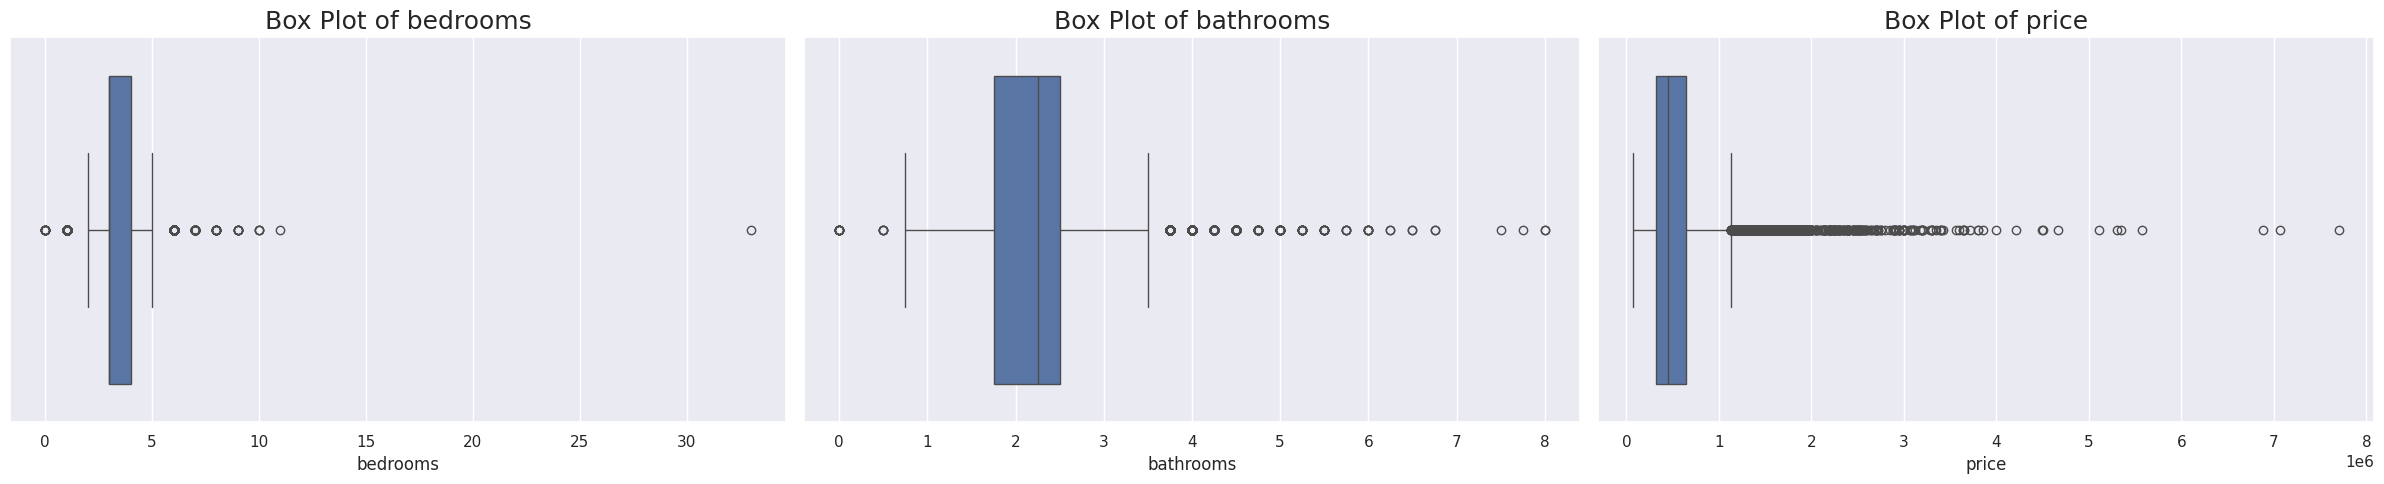

In [53]:
fig, axes = plt.subplots(1, 3, figsize=(24,5))

columns=['bedrooms','bathrooms','price']
i=0
# Iterate through each column and populate the subplots
for col in columns:
    sb.boxplot(x=rawData[col], ax=axes[i])
    axes[i].set_title(f'Box Plot of {col}', fontsize=18)

    # Increment the counter
    i += 1

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

**Remove Outliers**

In [54]:
# Define a function to remove outliers based on a specified threshold
def remove_outliers(df, columns):
    # Copy the DataFrame to avoid modifying the original
    df_clean = df.copy()

    # Iterate over each column
    for col in columns:
        # Calculate the first quartile (Q1) and third quartile (Q3)
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)

        # Calculate the interquartile range (IQR)
        IQR = Q3 - Q1

        # Define the lower and upper bounds for outliers
        lower_bound = Q1 - 2.5 * IQR
        upper_bound = Q3 + 2.5 * IQR

        # Filter out the outliers
        df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]

    return df_clean

# Call the function to remove outliers from the specified columns
df_cleaned = remove_outliers(rawData, columns)

# Display the cleaned DataFrame
df_cleaned.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [55]:
print("Before cleaning, dataset shape: ", rawData.shape)
print("After cleaning, dataset shape: ", df_cleaned.shape)

Before cleaning, dataset shape:  (21613, 21)
After cleaning, dataset shape:  (20863, 21)


#### **3.2.2. Boxplots *After* Removing Outliers**

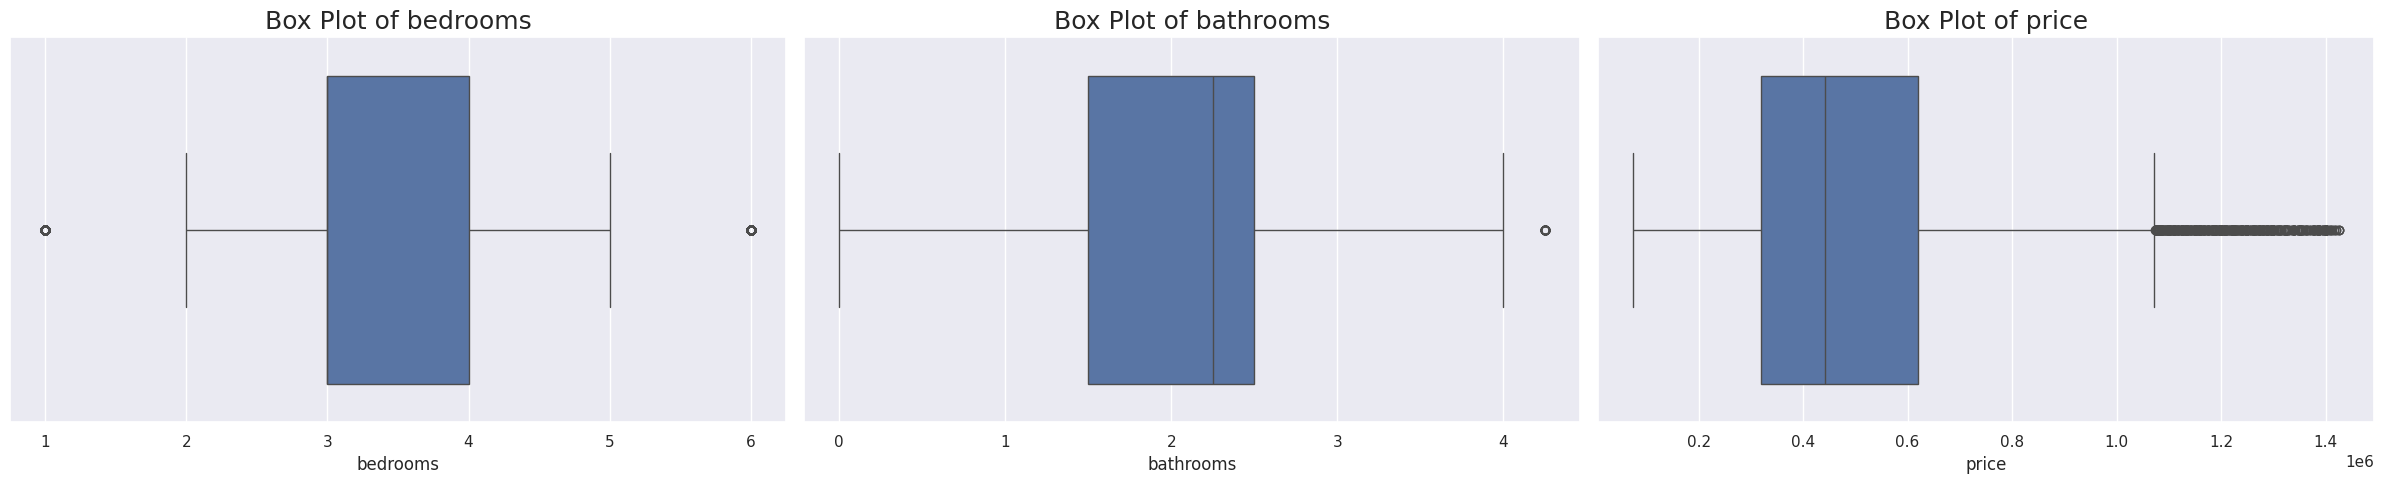

In [56]:
fig, axes = plt.subplots(1, 3, figsize=(24, 5))

columns=['bedrooms','bathrooms','price']#'floors','sqft_living','sqft_lot','sqft_above','sqft_basement','sqft_living15','sqft_lot15']
i=0
# Iterate through each column and populate the subplots
for col in columns:
    # Calculate the row and column index for the current subplot
    # row_index = i // 3
    # col_index = i % 3

    # Plot the box plot for the current column in the appropriate subplot
    sb.boxplot(x=df_cleaned[col], ax=axes[i])
    axes[i].set_title(f'Box Plot of {col}', fontsize=18)

    # Increment the counter
    i += 1

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

### **3.3. Feature Engineering**

Based on the insights gained through EDA, we decided to engineer 3 new features that might be helpful in helping to predicting the house sale price.


1. `building_age`: *Age of the property*  
Age was one of the important factors that affects house price according to article from Investopedia.
2. `yrs_since_renov`: *Number of years since last renovated*   
Renovated buildings might be more expensive.
3. `month`: *Month the house was sold*   
Based on EDA, house prices might vary during different months in a year.



In [57]:
#change the data type of date column to datetime
import datetime
df_cleaned['date'] = df_cleaned['date'].astype('datetime64[ns]')

#create three new columns storing the age of the building, number of years since renovated and number of years since it was sold
df_cleaned['building_age'] = (df_cleaned['date'].apply(lambda x: x.year) - df_cleaned['yr_built'])
df_cleaned['yrs_since_renov'] = (df_cleaned['date'].apply(lambda x: x.year) - df_cleaned['yr_renovated'])
df_cleaned['month'] = df_cleaned['date'].apply(lambda x: x.month)

#standardise values
df_cleaned['building_age'] = np.where(df_cleaned['building_age']<0, 0, df_cleaned['building_age'])
df_cleaned['yrs_since_renov'] = np.where(df_cleaned['yrs_since_renov']>2000, 0, df_cleaned['yrs_since_renov'])
df_cleaned['yrs_since_renov'] = np.where(df_cleaned['yrs_since_renov']<0, 0, df_cleaned['yrs_since_renov'])
df_cleaned.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,building_age,yrs_since_renov,month
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,1955,0,98178,47.5112,-122.257,1340,5650,59,0,10
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,1951,1991,98125,47.7210,-122.319,1690,7639,63,23,12
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,1933,0,98028,47.7379,-122.233,2720,8062,82,0,2
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,1965,0,98136,47.5208,-122.393,1360,5000,49,0,12
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,1987,0,98074,47.6168,-122.045,1800,7503,28,0,2


#### **3.3.1. Dropping Unnecessary Columns**

In [58]:
df_final = df_cleaned.drop(['id', 'date', 'yr_built', 'yr_renovated', 'zipcode'], axis=1)#, 'lat', 'long'], axis=1)
df_final.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,lat,long,sqft_living15,sqft_lot15,building_age,yrs_since_renov,month
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,47.5112,-122.257,1340,5650,59,0,10
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,47.7210,-122.319,1690,7639,63,23,12
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,47.7379,-122.233,2720,8062,82,0,2
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,47.5208,-122.393,1360,5000,49,0,12
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,47.6168,-122.045,1800,7503,28,0,2


In [59]:
print('Original dataset shape: ', rawData.shape)
print('Final dataset shape: ', df_final.shape)

Original dataset shape:  (21613, 21)
Final dataset shape:  (20863, 19)


#### **3.3.2. Further Analysis on New Engineered Features**

Although the three new features were added based on external research and assumptions, it might not be useful in predicting house sale price accurately for this `kc_house_data` dataset. Therefore, further analysis on these new features are done to ensure they hold some sort of significance in predicting house sale price in this case.

**Linear Relationship Between House Sale Price With** ***Numerical Variables:***

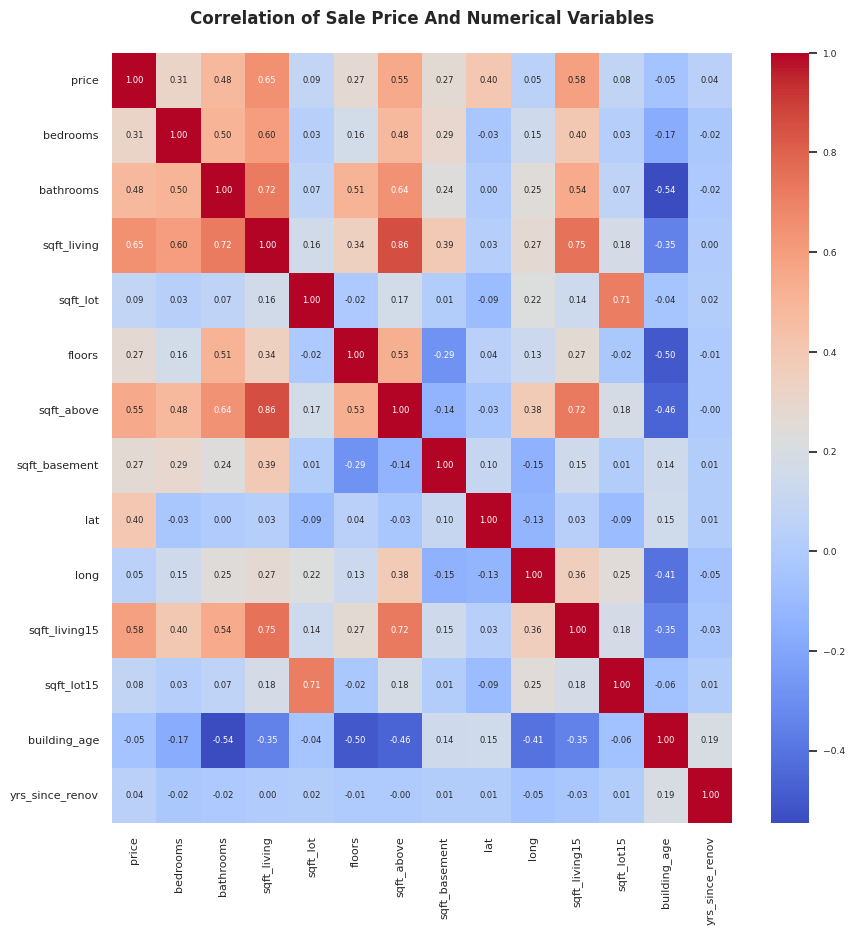

In [60]:
cor = df_final.drop(['waterfront','view','condition','grade','month'],axis=1).corr()
sb.set(font_scale=0.6)
plt.figure(figsize=(10,10))
plt.title('Correlation of Sale Price And Numerical Variables\n', fontweight='bold', fontsize=12)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
sb.heatmap(cor, annot=True, fmt=".2f", cmap='coolwarm',annot_kws={"fontsize":6})
plt.show()

Both `building_age` and `yrs_since_renov` have relatively **weak linear relationship** to `price`. While building age has negative correlation of -0.05, years since renovated has positive correlation of 0.04.

**Relationship Between House Sale Price With** ***Categorical Variables:***

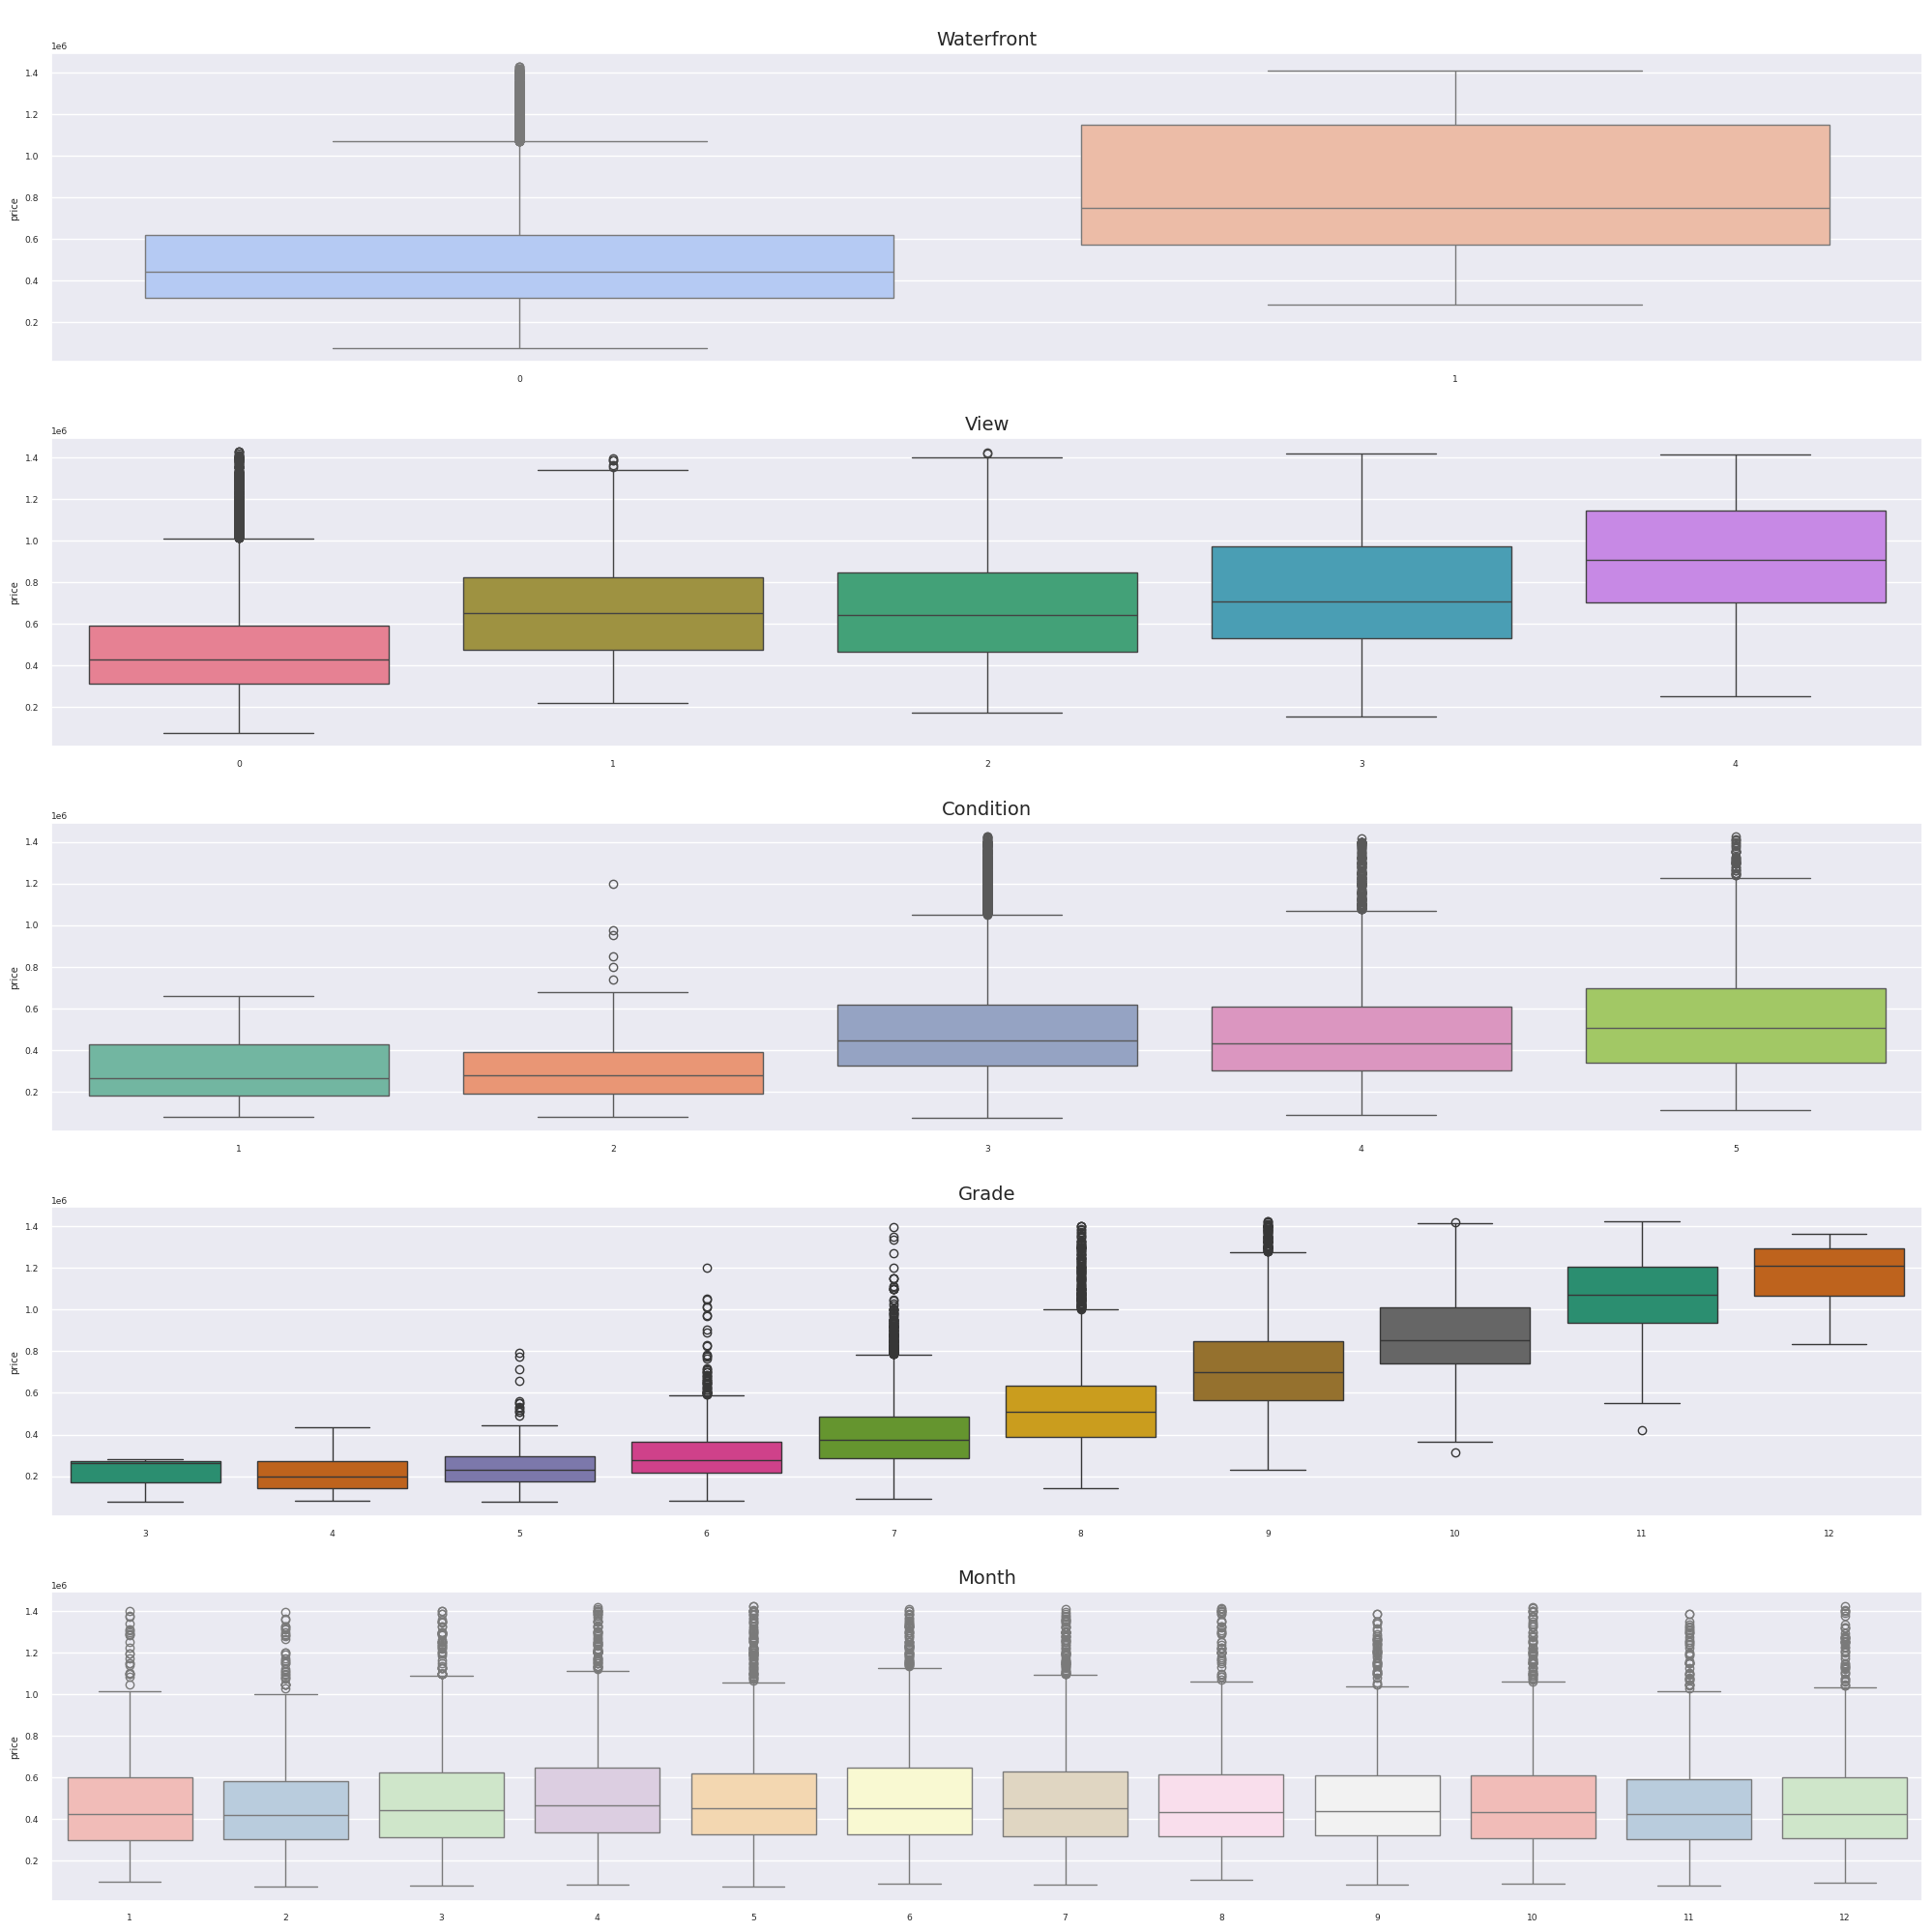

In [61]:
# Set up the figure and axes
fig, axes = plt.subplots(5, 1, figsize=(20, 20))

df_cat=df_final[['waterfront','view','condition','grade','month','price']]

# Plot boxplots for each categorical variable
sb.boxplot(x="waterfront", y="price", data=df_cat, ax=axes[0], palette="coolwarm")
sb.boxplot(x="view", y="price", data=df_cat, ax=axes[1], palette="husl")
sb.boxplot(x="condition", y="price", data=df_cat, ax=axes[2], palette="Set2")
sb.boxplot(x="grade", y="price", data=df_cat, ax=axes[3], palette="Dark2")
sb.boxplot(x="month", y="price", data=df_cat, ax=axes[4], palette="Pastel1")

# Set titles for each subplot
axes[0].set_title('\nWaterfront', fontsize=14)
axes[1].set_title('\nView', fontsize=14)
axes[2].set_title('\nCondition', fontsize=14)
axes[3].set_title('\nGrade', fontsize=14)
axes[4].set_title('\nMonth', fontsize=14)

# # Set common x-axis label
# axes[-1].set_xlabel('Category', fontsize=14)
for ax in axes:
    ax.set_xlabel('')

plt.tight_layout()
plt.show()


The different categories of the `month` column **do not** seem to have **distinct differences** between them. This suggests that month sold have weak relationship with `price`.

#### **3.3.3. Final Dataset**

Based on the analysis done above, all three new features **do not** have a significant relationship with house sale price.

* `building_age`: While the correlation is weak, the age of the building is a common predictor in real estate models as it often influences the sale price. Keeping this variable is reasonable, especially considering its potential significance in the context of house pricing.

* `yrs_since_renov`: Although this variable has weak correlation with house sale price, the presence of a renovation could still be valuable information. According the investopedia, remodelled houses can increase the return on investment (RIO) of the house.

    Link: https://www.investopedia.com/articles/mortgages-real-estate/08/add-value-to-real-estate.asp

* `month`: Boxplots did not reveal distinct differences between each category in this column in relation to sale price. This suggests that the month of sale may not have a substantial influence on house prices in your dataset. Furthermore, this dataset only contains data for 1 year which is not enough to prove this variable might have any significance in predicting house sale price.  

Hence, only the `month` column will be removed.


In [62]:
df_final = df_final.drop(['month'], axis=1)
df_final.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,lat,long,sqft_living15,sqft_lot15,building_age,yrs_since_renov
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,47.5112,-122.257,1340,5650,59,0
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,47.7210,-122.319,1690,7639,63,23
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,47.7379,-122.233,2720,8062,82,0
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,47.5208,-122.393,1360,5000,49,0
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,47.6168,-122.045,1800,7503,28,0


In [63]:
print('Original dataset shape: ', rawData.shape)
print('Final dataset shape: ', df_final.shape)

Original dataset shape:  (21613, 21)
Final dataset shape:  (20863, 18)


In [75]:
df_final.to_csv("cleaned_kc_house_data.csv")